###  import libary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## load data

In [2]:
df = pd.read_csv("D:\\csv files\\news.csv")

In [3]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


###  get column name of data

In [4]:
df.keys()

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
len(df)

6335

### checking for null value in dataset

In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df.label.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Split the data into train and test dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

## feature extraction

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)


## train PassiveAggressiveClassifier 

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier
pass_clf = PassiveAggressiveClassifier(max_iter=50)
pass_clf.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

### get Accuracy_score

In [11]:
y_pred = pass_clf.predict(tfidf_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:93.61%


### confusion_matrix

In [12]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [13]:
con_mat

array([[587,  41],
       [ 40, 599]], dtype=int64)

<AxesSubplot:>

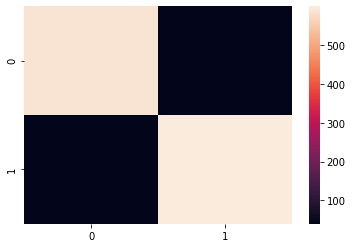

In [14]:
sb.heatmap(con_mat)

                                --The End--